<a href="https://colab.research.google.com/github/TamaraMladenovic/AI-project/blob/main/CS324_PX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from numpy import sort

In [ ]:
df = pd.read_csv('telescope.csv')
df.shape

(19020, 11)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In [ ]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

Možemo primetiti da u skupu ne postoji ni jedna null vrednost podataka.

In [ ]:
df[df.duplicated()]

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
12827  202.8290  73.9967  4.3622  0.0678  0.0364  -66.4079 -159.3540   
13332   30.1721  16.8838  2.6902  0.4673  0.2704    8.8759   25.3694   
13486   69.7676  18.9821  2.7478  0.5255  0.2654  -44.5832  -30.7591   
14150  130.3080  13.3030  2.6021  0.3250  0.1812 -204.5730  116.0500   
14160   16.9894  11.0002  2.4564  0.6294  0.3514   -3.4902    8.0823   
...         ...      ...     ...     ...     ...       ...       ...   
18809   60.5328  34.9208  3.0436  0.2732  0.1750  -39.5703   45.4899   
18826   38.7641  20.0218  2.6279  0.2921  0.1543  -49.9354  -21.7010   
18831   22.2134  18.3853  2.5653  0.4354  0.2599  -16.5600   16.1254   
18929   19.8489  12.8985  2.3847  0.5567  0.3155  -12.1732  -10.7301   
19001   57.1905  35.5095  2.7177  0.2337  0.1197  -48.5112  -54.2835   

       fM3Trans   fAlpha     fDist class  
12827  -21.2584  76.1130  348.9780     h  
13332   14.0300  74.7090  229.2960     h  
13486  -12.9547  33.0052  303.9140     h  
14150    4.7837  49.7590  173.5520     h  
14160   -7.0516  55.3930   91.3761     h  
...         ...      ...       ...   ...  
18809  -28.7449   0.8124  290.6000     h  
18826  -13.0915  19.7802  136.9650     h  
18831   13.1403  23.6480   93.1750     h  
18929    7.9112  55.0925  168.9720     h  
19001   32.3612  44.7320  102.9950     h  

[115 rows x 11 columns]

Imamo dosta duplikata koji moraju da se obiršu.

In [ ]:
df.drop_duplicates(inplace=True)

Duplikati su obrisani.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18905 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18905 non-null  float64
 1   fWidth    18905 non-null  float64
 2   fSize     18905 non-null  float64
 3   fConc     18905 non-null  float64
 4   fConc1    18905 non-null  float64
 5   fAsym     18905 non-null  float64
 6   fM3Long   18905 non-null  float64
 7   fM3Trans  18905 non-null  float64
 8   fAlpha    18905 non-null  float64
 9   fDist     18905 non-null  float64
 10  class     18905 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


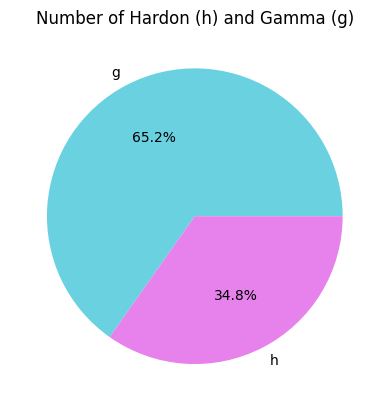

In [ ]:
class_count = df['class'].value_counts()
colors = ['#69d1e0', '#e781eb']
class_count.plot(kind='pie', colors=colors, autopct='%1.1f%%')

plt.title('Number of Hardon (h) and Gamma (g)')
plt.ylabel('')
plt.show()

Ovde možemo videti podeljenost između Gama i Hardon zraka

# ***Explorative Data Analysis***

<ipython-input-19-fdb7bf5b6c32>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


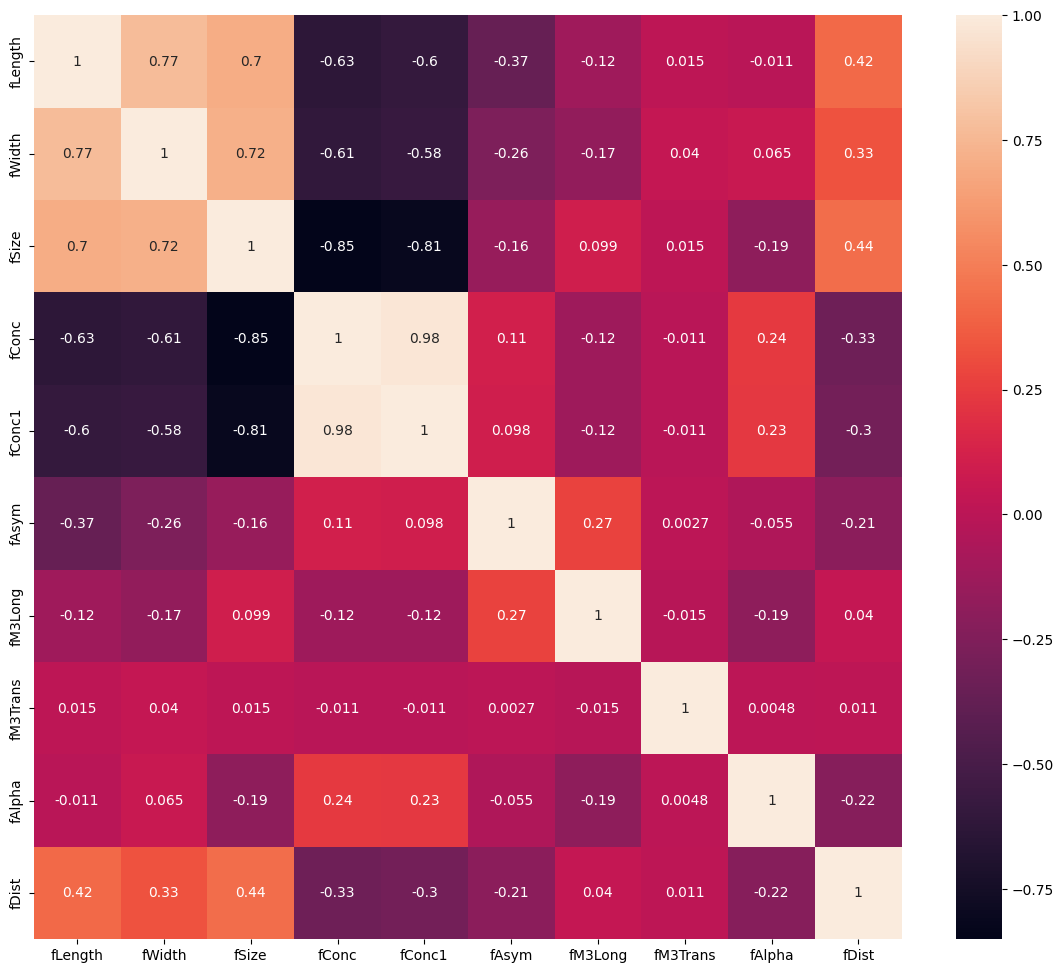

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

Možemo videti jaku pozitivnu korelaciju između FfConc i fConc1. Takođe, možemo videti i jaku nedativnu korelaciju između fSize sa fConf i fConf1.

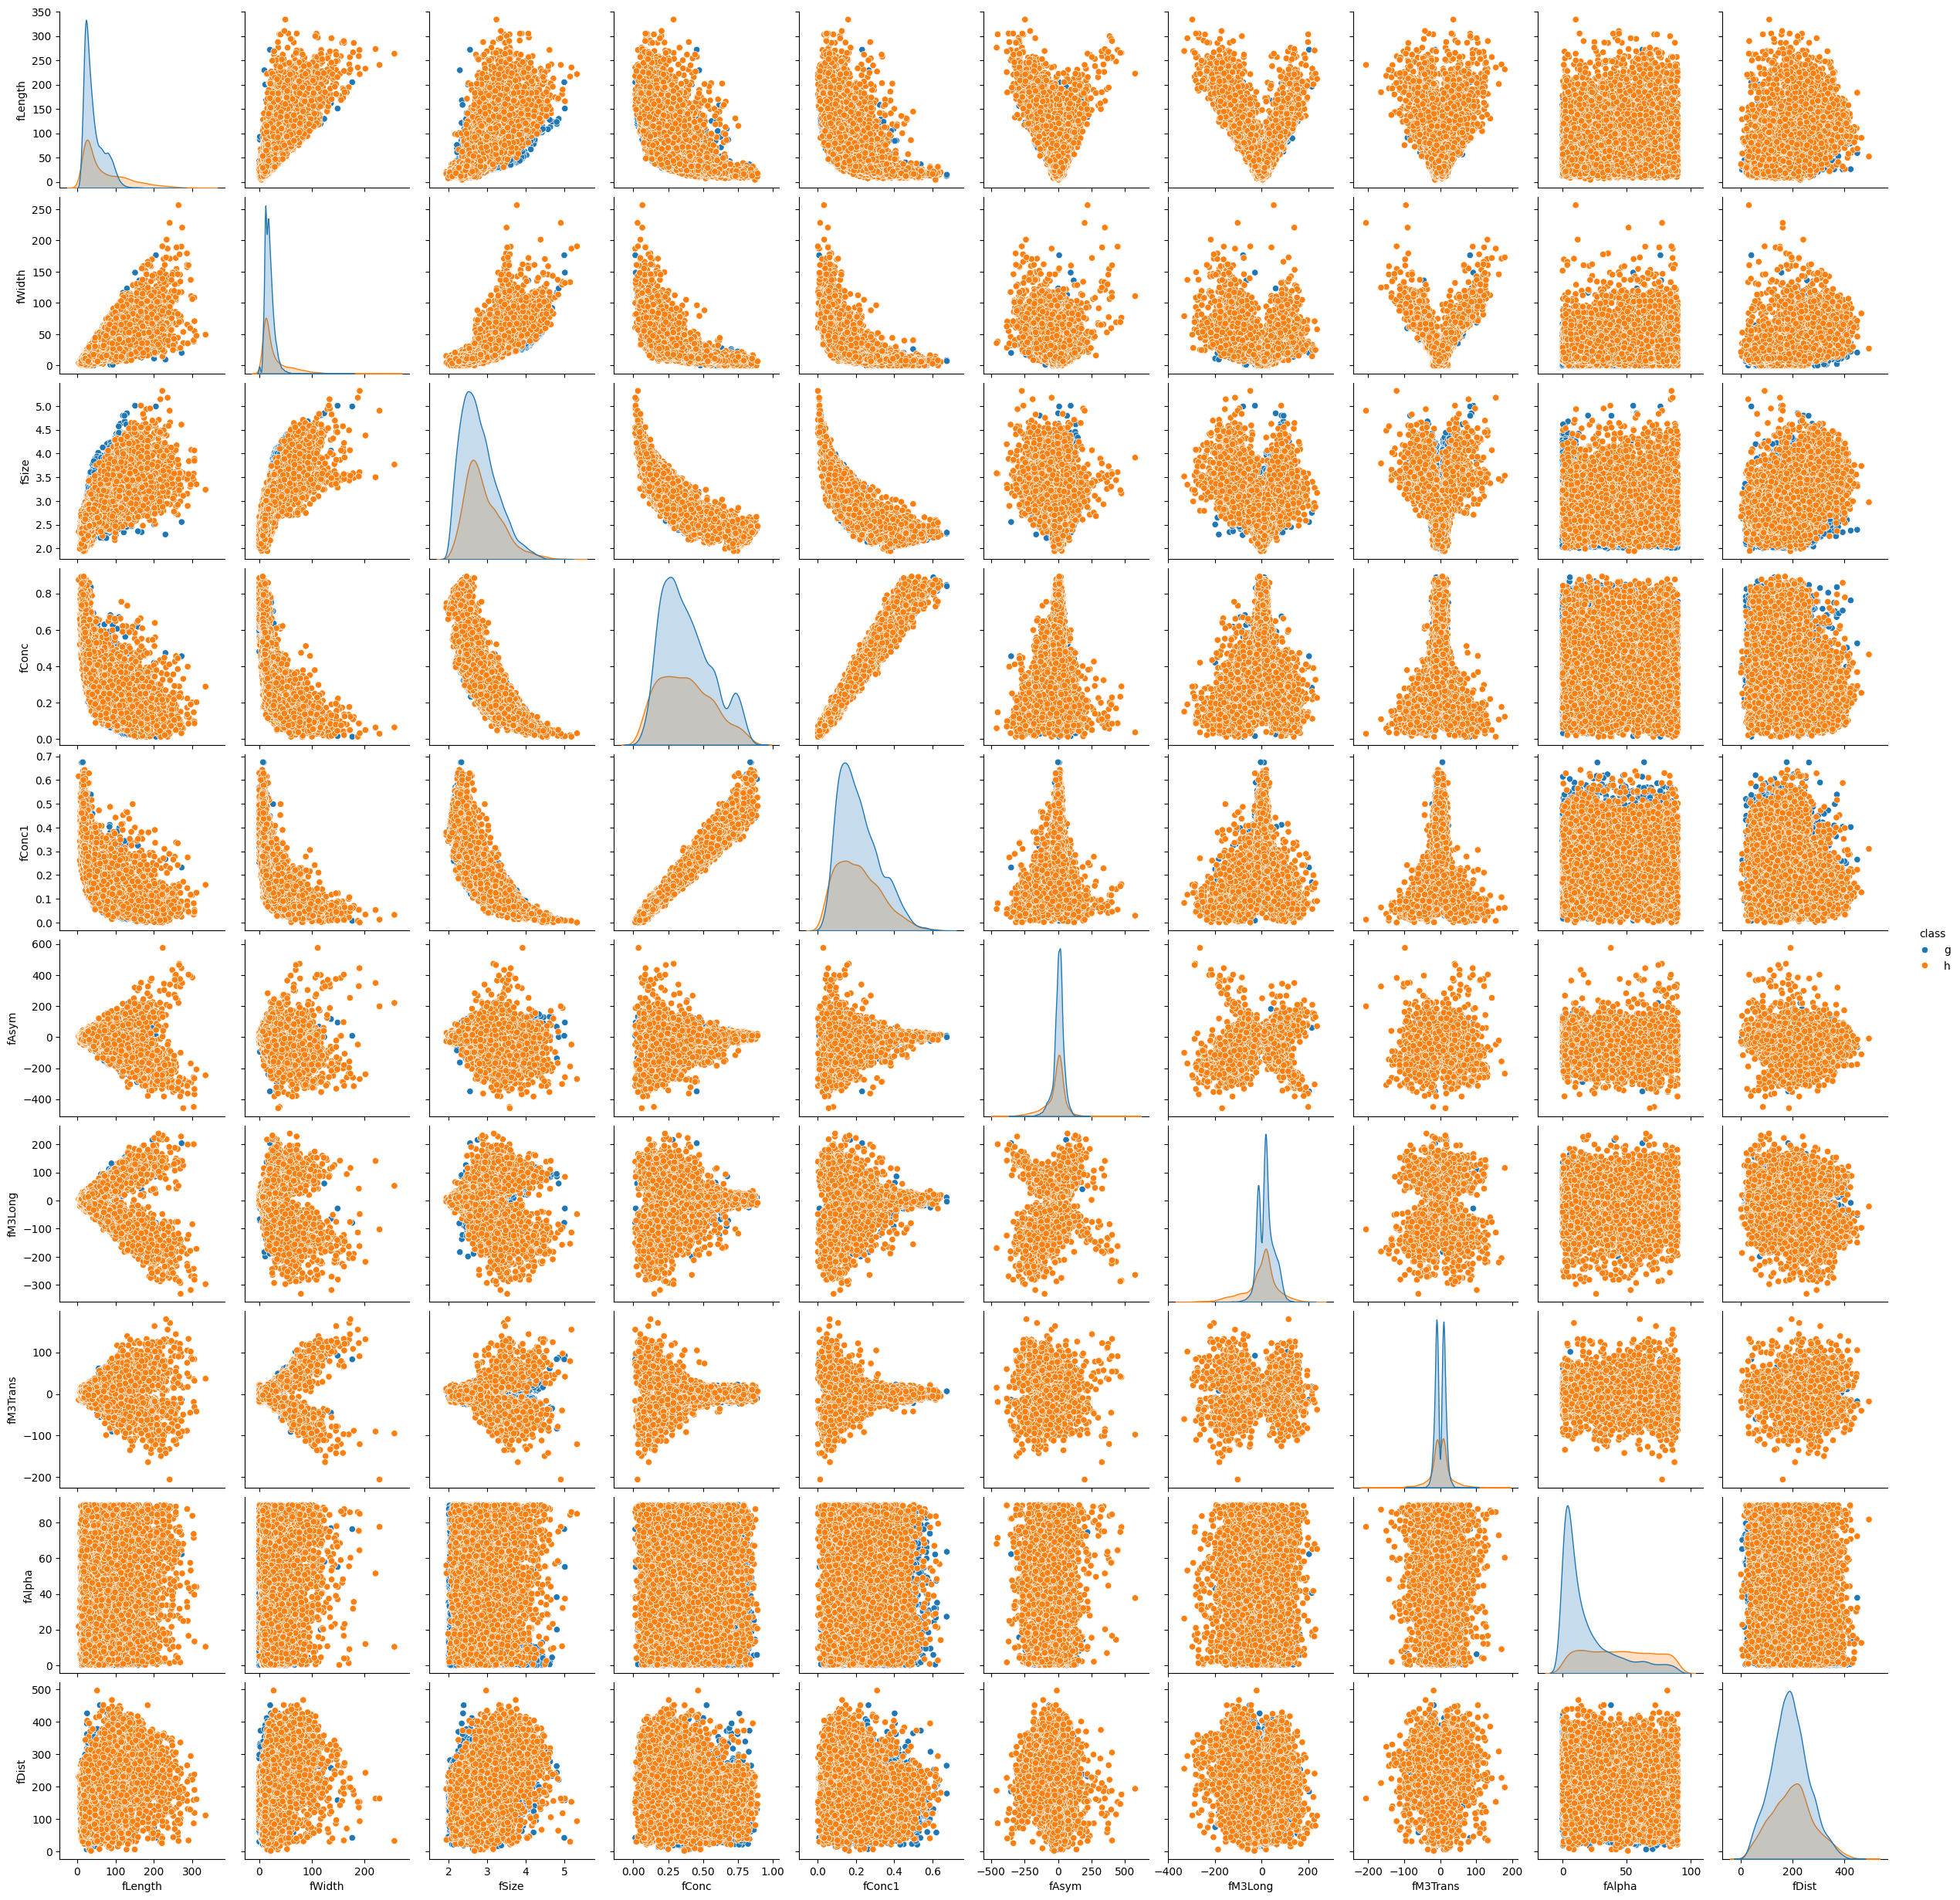

In [ ]:
sns.pairplot(df,hue='class')
plt.show()

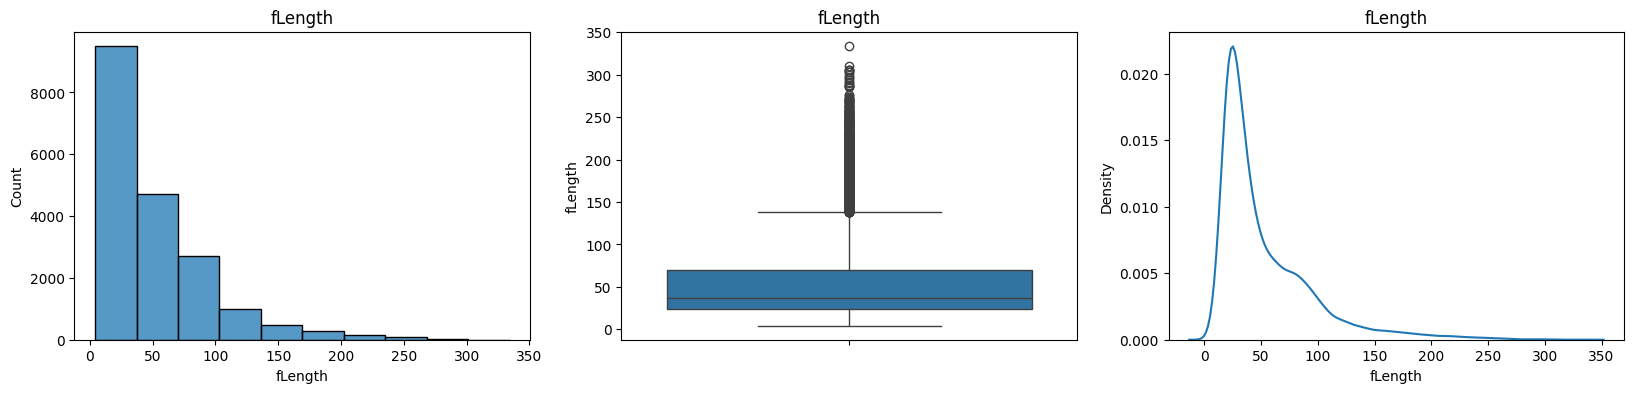

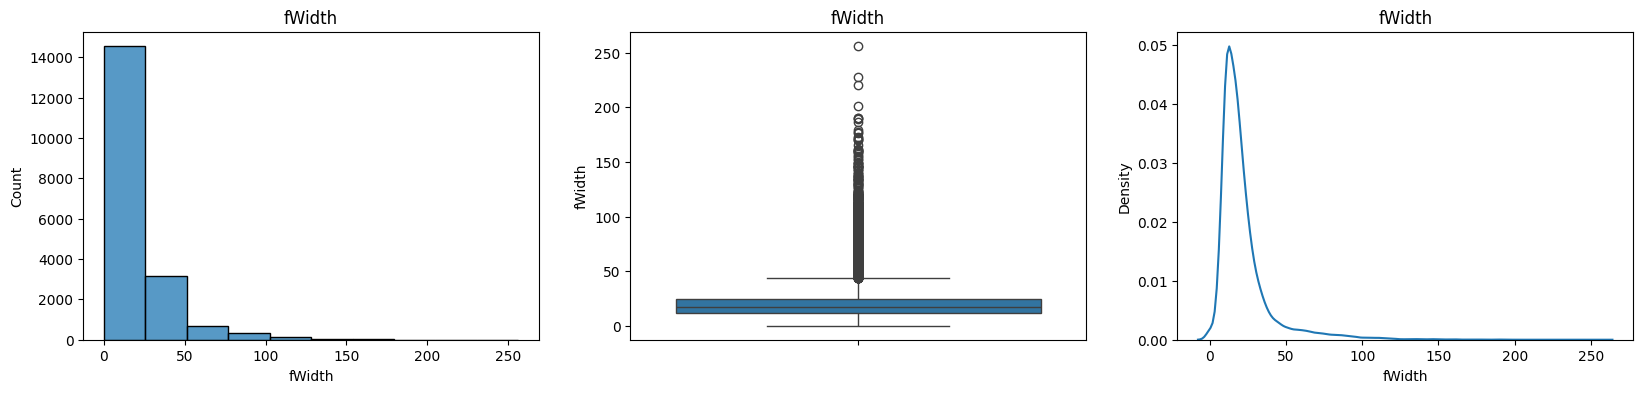

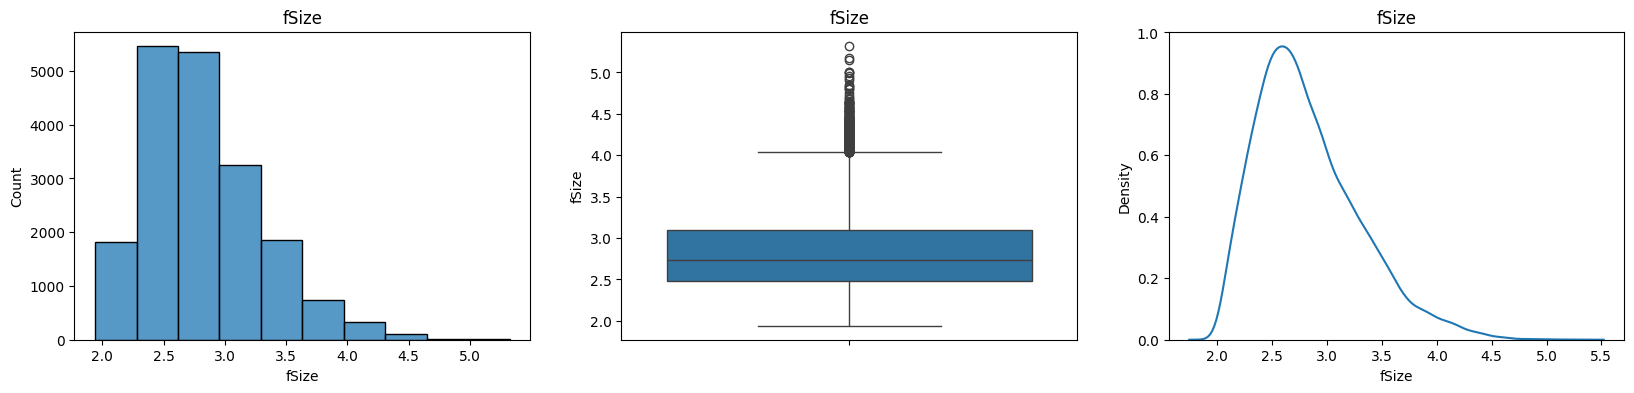

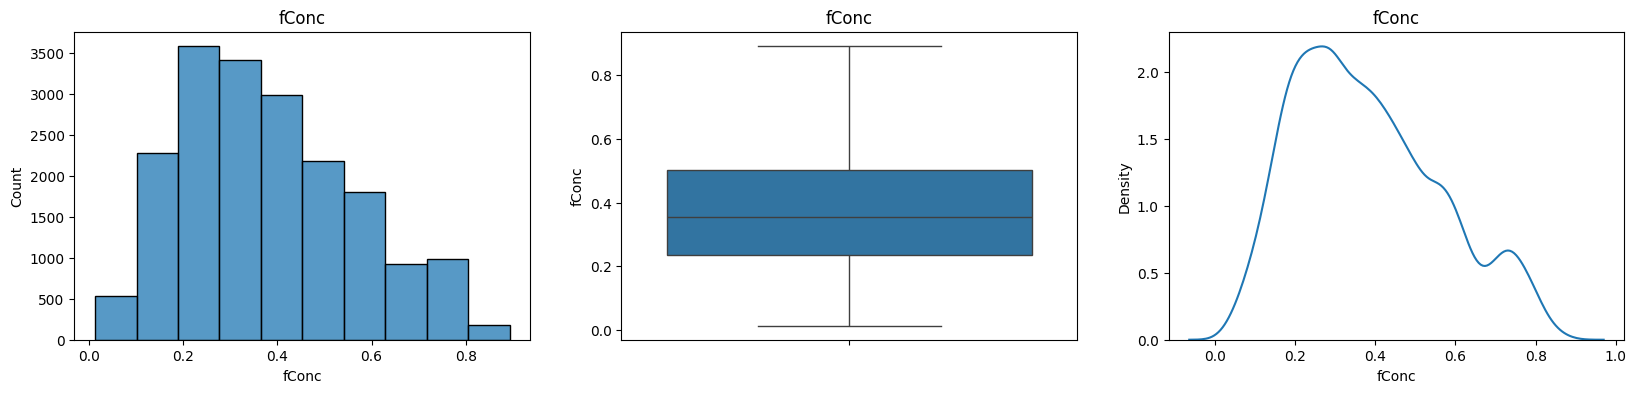

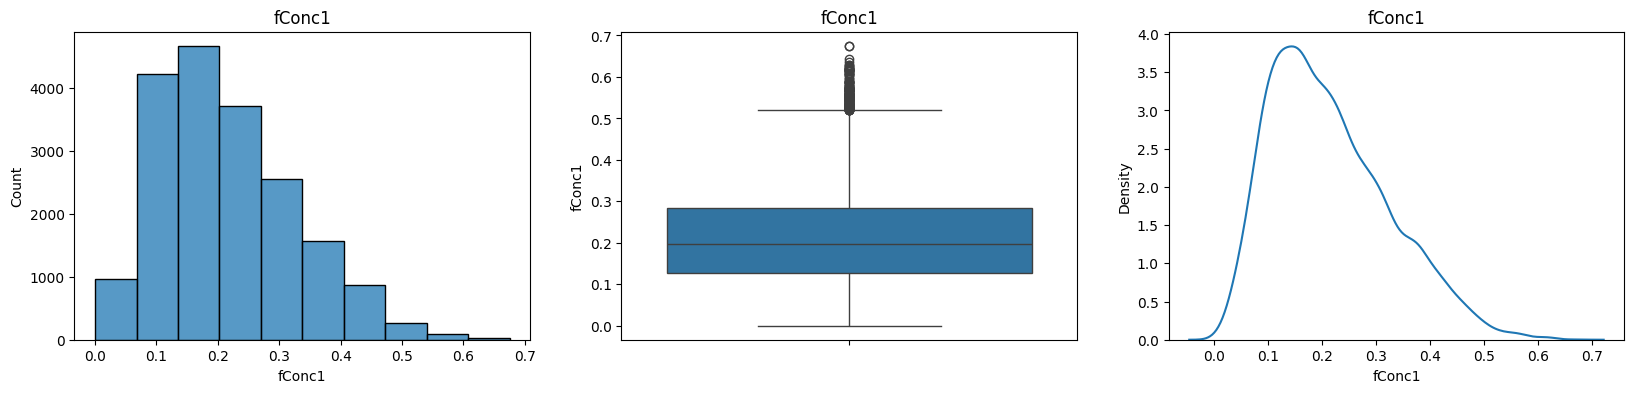

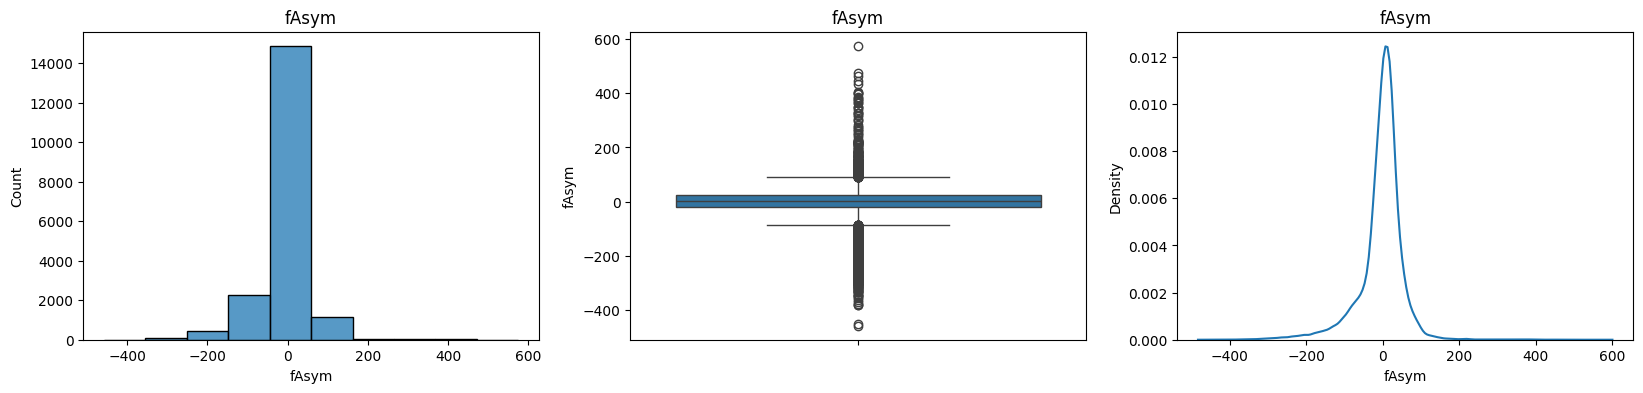

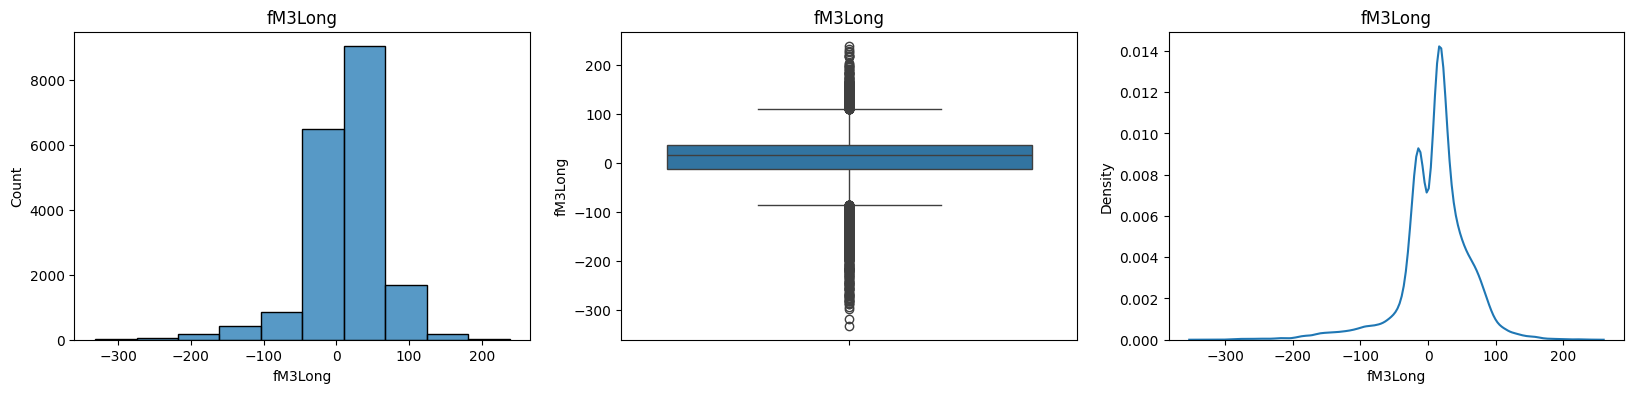

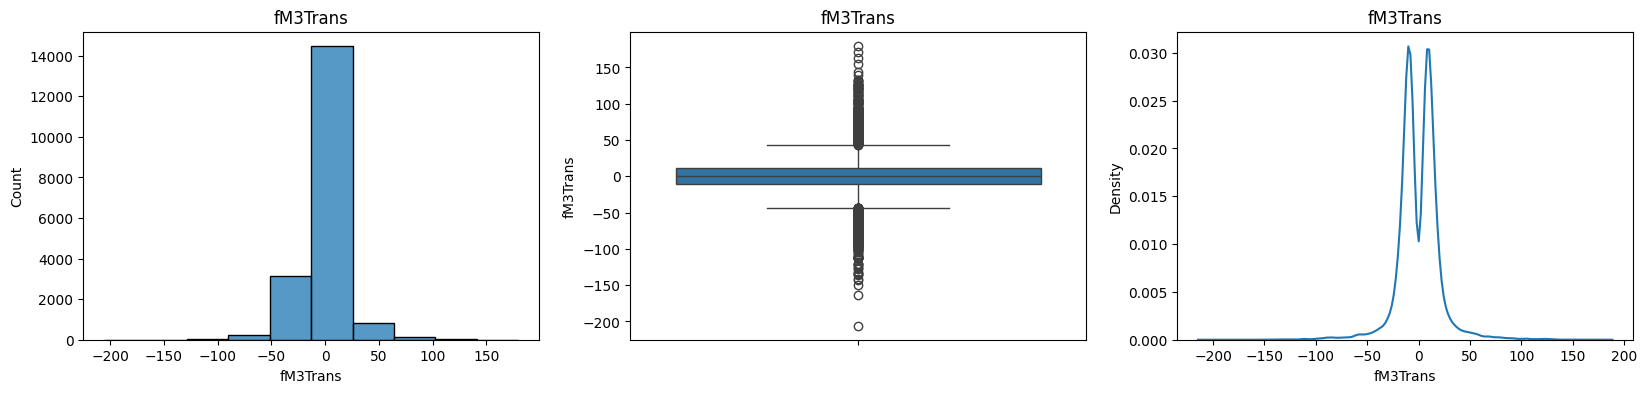

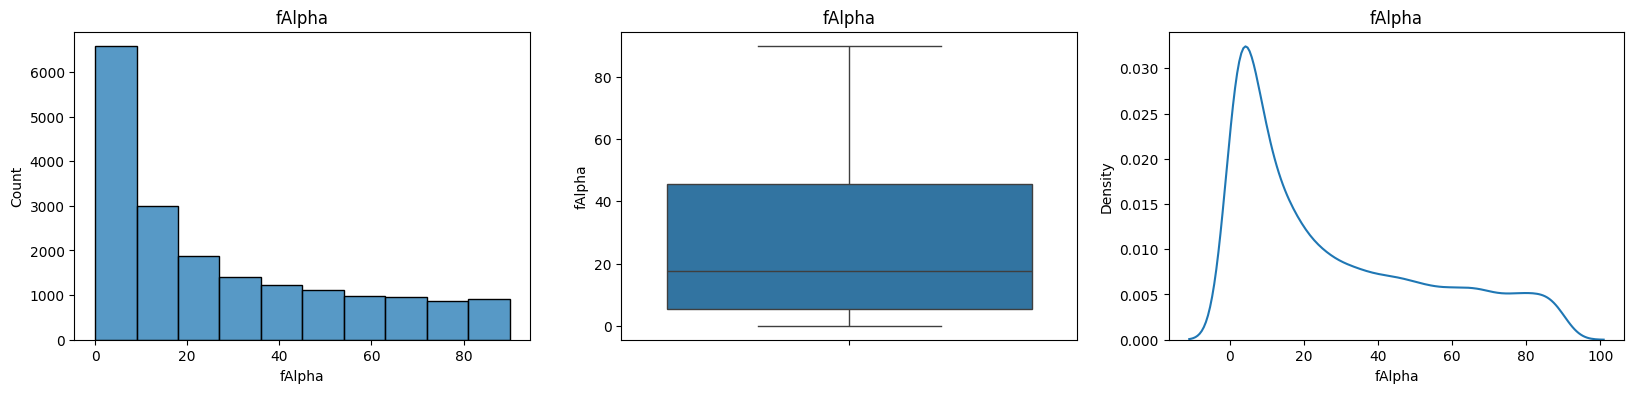

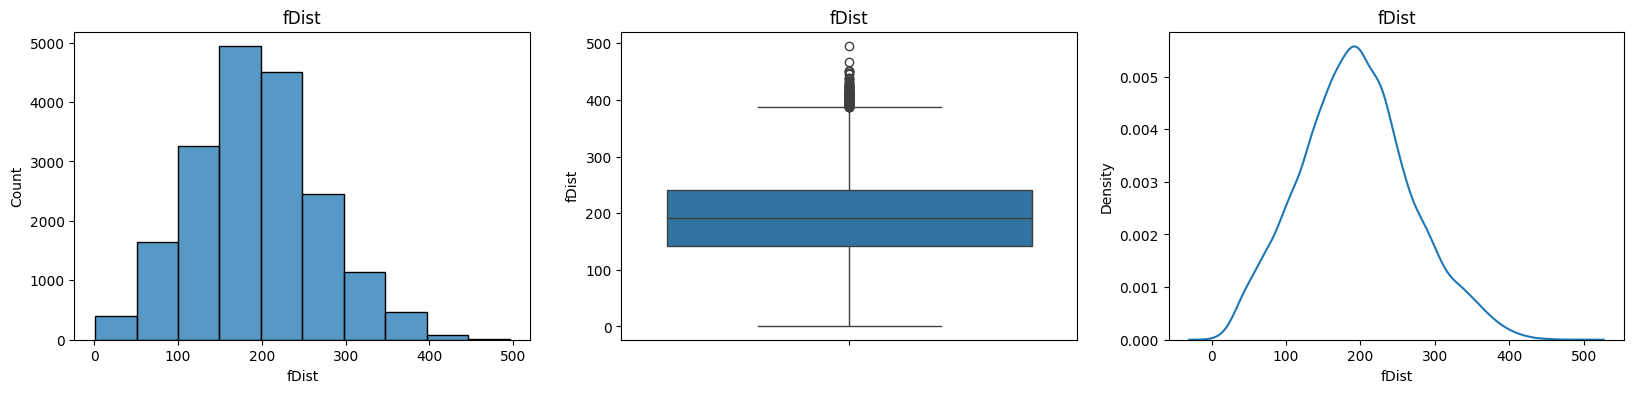

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in df._get_numeric_data().columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)

    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)

    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

Jasno se vide outlier-i na određenim grafovima

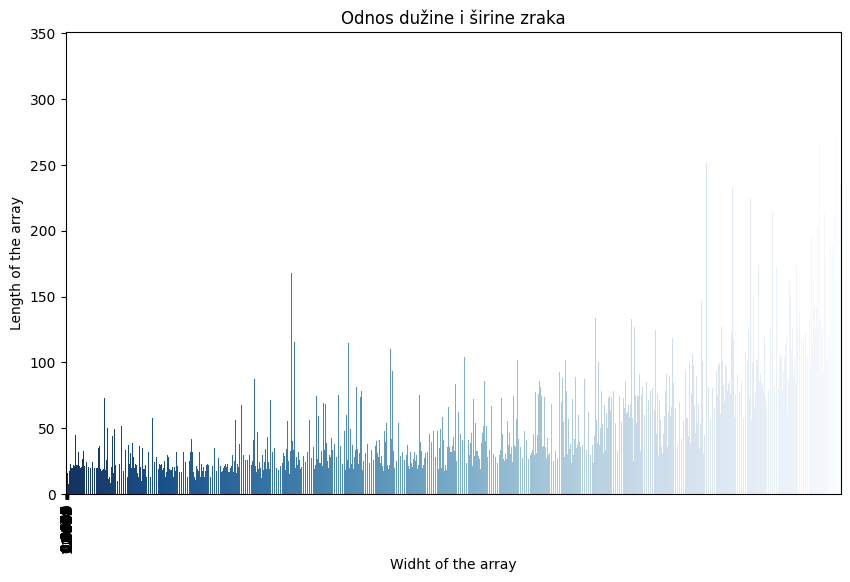

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

average_prices = df.groupby('fWidth')['fLength'].mean().reset_index()

palette = 'Blues_r'
sns.barplot(x='fWidth', y='fLength', data=average_prices, palette=palette, )
plt.xlabel('Widht of the array')
plt.ylabel('Length of the array')
plt.title('Odnos dužine i širine zraka')
plt.xticks(range(0, 50, 1))
plt.tick_params(axis='x', rotation=90)

# Treniranje modela

Prvo moramo da prebacimo kate

In [ ]:
df['class']=df['class'].map(lambda x: x=='g')

In [ ]:
X = df.drop('class', axis=1)
Y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
model=XGBClassifier(n_estimators=55)

KNN Model


In [ ]:
acc = []
from sklearn import metrics
for i in range(1,50):
    model1 = KNeighborsClassifier(n_neighbors = i,p=1).fit(X_train,y_train)
    prediction = model1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, prediction))

print(max(acc))

0.8220047606453319


In [ ]:
rf = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=42)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)

print(rf_score)

0.5910665414077622


In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set,verbose=0)
predictions = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, predictions)
print(auc)

0.9413136731720804


In [ ]:
feature_importances = model.feature_importances_

# Sort feature importances in ascending order
thresholds = sorted(feature_importances)

# Iterate through the thresholds
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # Train model
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    # Evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict_proba(select_X_test)[:,1]
    auc = roc_auc_score(y_test, predictions)

    print("Thresh=%.3f, n=%d, AUC: %.4f" % (thresh, select_X_train.shape[1], auc))

Thresh=0.029, n=10, AUC: 0.9389
Thresh=0.035, n=9, AUC: 0.9388
Thresh=0.048, n=8, AUC: 0.9388
Thresh=0.058, n=7, AUC: 0.9378
Thresh=0.062, n=6, AUC: 0.9338
Thresh=0.062, n=5, AUC: 0.9289
Thresh=0.087, n=4, AUC: 0.9168
Thresh=0.096, n=3, AUC: 0.8847
Thresh=0.193, n=2, AUC: 0.8590
Thresh=0.330, n=1, AUC: 0.7773


In [ ]:
selection = SelectFromModel(model, threshold=0.059, prefit=True)
select_X_train = selection.transform(X_train.copy())
select_X_test = selection.transform(X_test.copy())
selection_model = xgb.XGBClassifier(n_estimators=66)

In [ ]:
selection_model.fit(select_X_train, y_train)
eval_set2 = [(select_X_train, y_train), (select_X_test, y_test)]
selection_model.fit(select_X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set2,verbose=False)
predictions = selection_model.predict_proba(select_X_test)[:,1]

In [ ]:
auc = roc_auc_score(y_test, predictions)
print(auc)

0.9346168660327951


In [ ]:
parametri = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 90, 'subsample': 0.9,'colsample_bytree': 1.0, 'gamma': 0.2, 'min_child_weight': 5, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
model = xgb.XGBClassifier(**parametri)

model.fit(select_X_train, y_train)
y_pred_proba = model.predict_proba(select_X_test)[:, 1]

# Evaluate the model using AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score: {:.4f}".format(auc_roc))

AUC-ROC Score: 0.9351


Nakon isprobanih par modela vidimo da je prvi najprecizniji i sada ćemo pomoću njega ispisati detaljnije podatke.

In [ ]:
print(classification_report(y_test,model.predict(select_X_test)))

              precision    recall  f1-score   support

       False       0.87      0.77      0.82      1295
        True       0.89      0.94      0.91      2486

    accuracy                           0.88      3781
   macro avg       0.88      0.86      0.87      3781
weighted avg       0.88      0.88      0.88      3781

